## Exploratory Data Analisys
### Topic (**Currency Exchange**) according to news portal

### Load
Data

In [3]:
import pandas as pd
import numpy as np
import pickle

In [4]:
data = pickle.load(open('data/df_clean_izq.pkl','rb'))

In [5]:
ex_izq = data.loc[data.topics == 'exchange']
ex_izq.shape

(26, 7)

In [6]:
data = pickle.load(open('data/df_clean_der.pkl','rb'))

In [7]:
ex_der = data.loc[data.topics == 'exchange']
ex_der.shape

(28, 7)

Tokens

In [8]:
tokens_izq = pd.read_pickle('tokens/topic_tokens_izq_new.pkl')
tokens_der = pd.read_pickle('tokens/topic_tokens_der_new.pkl')

In [9]:
tokens_izq_ex = tokens_izq[tokens_izq.topics == 'exchange'].drop('topics', axis=1)

In [10]:
tokens_der_ex = tokens_der[tokens_der.topics == 'exchange'].drop('topics', axis=1)

### Versus

#### Length
How many words?

In [11]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import unidecode

In [12]:
stopwords_sp = stopwords.words('spanish')

In [13]:
def tokenizer(texto):

    alphanumeric = re.sub(r'([^\s\w]|_)+', '', texto).lower()
    no_accents = unidecode.unidecode(alphanumeric)
    
    tockens = word_tokenize(no_accents)
    
    tockens_clean = [tocken for tocken in tockens if tocken not in stopwords_sp and tocken.isalpha()]
    
    terminos = tockens_clean

    return terminos

In [14]:
words_izq = [tokenizer(documento) for documento in ex_izq.body.values]
words_der = [tokenizer(documento) for documento in ex_der.body.values]

In [15]:
for i, (izq, der) in enumerate(zip(words_izq, words_der)):
    print(f'Collected doc. {i}: {len(izq)} words VS {len(der)} words')

Collected doc. 0: 220 words VS 263 words
Collected doc. 1: 95 words VS 292 words
Collected doc. 2: 109 words VS 264 words
Collected doc. 3: 109 words VS 391 words
Collected doc. 4: 209 words VS 241 words
Collected doc. 5: 104 words VS 349 words
Collected doc. 6: 365 words VS 225 words
Collected doc. 7: 371 words VS 256 words
Collected doc. 8: 196 words VS 271 words
Collected doc. 9: 271 words VS 408 words
Collected doc. 10: 203 words VS 338 words
Collected doc. 11: 123 words VS 297 words
Collected doc. 12: 166 words VS 305 words
Collected doc. 13: 103 words VS 451 words
Collected doc. 14: 178 words VS 273 words
Collected doc. 15: 83 words VS 303 words
Collected doc. 16: 133 words VS 192 words
Collected doc. 17: 95 words VS 251 words
Collected doc. 18: 117 words VS 340 words
Collected doc. 19: 95 words VS 395 words
Collected doc. 20: 207 words VS 170 words
Collected doc. 21: 153 words VS 261 words
Collected doc. 22: 143 words VS 150 words
Collected doc. 23: 111 words VS 43 words
Collect

#### Lexicon
How many unique words?

In [16]:
for i, (izq, der) in enumerate(zip(words_izq, words_der)):
    print(f'Collected doc. {i}: {len(set(izq))} words VS {len(set(der))} words')

Collected doc. 0: 167 words VS 221 words
Collected doc. 1: 81 words VS 234 words
Collected doc. 2: 91 words VS 199 words
Collected doc. 3: 92 words VS 282 words
Collected doc. 4: 177 words VS 193 words
Collected doc. 5: 86 words VS 262 words
Collected doc. 6: 269 words VS 170 words
Collected doc. 7: 286 words VS 198 words
Collected doc. 8: 148 words VS 217 words
Collected doc. 9: 216 words VS 324 words
Collected doc. 10: 166 words VS 250 words
Collected doc. 11: 108 words VS 221 words
Collected doc. 12: 134 words VS 242 words
Collected doc. 13: 86 words VS 309 words
Collected doc. 14: 151 words VS 205 words
Collected doc. 15: 70 words VS 215 words
Collected doc. 16: 108 words VS 168 words
Collected doc. 17: 85 words VS 191 words
Collected doc. 18: 103 words VS 241 words
Collected doc. 19: 81 words VS 297 words
Collected doc. 20: 171 words VS 140 words
Collected doc. 21: 118 words VS 199 words
Collected doc. 22: 115 words VS 122 words
Collected doc. 23: 88 words VS 37 words
Collected do

#### Ratio
Unique words per words

In [17]:
for i, (izq, der) in enumerate(zip(words_izq, words_der)):
    print(f'Collected doc. {i}: {round(len(set(izq)) / len(izq),2)} words VS {round(len(set(der)) / len(der),2)} words')

Collected doc. 0: 0.76 words VS 0.84 words
Collected doc. 1: 0.85 words VS 0.8 words
Collected doc. 2: 0.83 words VS 0.75 words
Collected doc. 3: 0.84 words VS 0.72 words
Collected doc. 4: 0.85 words VS 0.8 words
Collected doc. 5: 0.83 words VS 0.75 words
Collected doc. 6: 0.74 words VS 0.76 words
Collected doc. 7: 0.77 words VS 0.77 words
Collected doc. 8: 0.76 words VS 0.8 words
Collected doc. 9: 0.8 words VS 0.79 words
Collected doc. 10: 0.82 words VS 0.74 words
Collected doc. 11: 0.88 words VS 0.74 words
Collected doc. 12: 0.81 words VS 0.79 words
Collected doc. 13: 0.83 words VS 0.69 words
Collected doc. 14: 0.85 words VS 0.75 words
Collected doc. 15: 0.84 words VS 0.71 words
Collected doc. 16: 0.81 words VS 0.88 words
Collected doc. 17: 0.89 words VS 0.76 words
Collected doc. 18: 0.88 words VS 0.71 words
Collected doc. 19: 0.85 words VS 0.75 words
Collected doc. 20: 0.83 words VS 0.82 words
Collected doc. 21: 0.77 words VS 0.76 words
Collected doc. 22: 0.8 words VS 0.81 words
Col

### Clouds
Word count per corpus

In [18]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [19]:
def count_words(df):
    top_words = {}
    for column in df.transpose().columns:
        top = df.transpose()[column].sort_values(ascending=False).head(30)
        top_words[column] = list(zip(top.index, top.values))
    return top_words

In [20]:
top_words_izq = count_words(tokens_izq_ex)

In [21]:
words_izq = [word for docs, w_counts in top_words_izq.items() for word in list(word for word, num in w_counts)]

In [22]:
top_words_der = count_words(tokens_der_ex)

In [23]:
words_der = [word for docs, w_counts in top_words_der.items() for word in list(word for word, num in w_counts)]

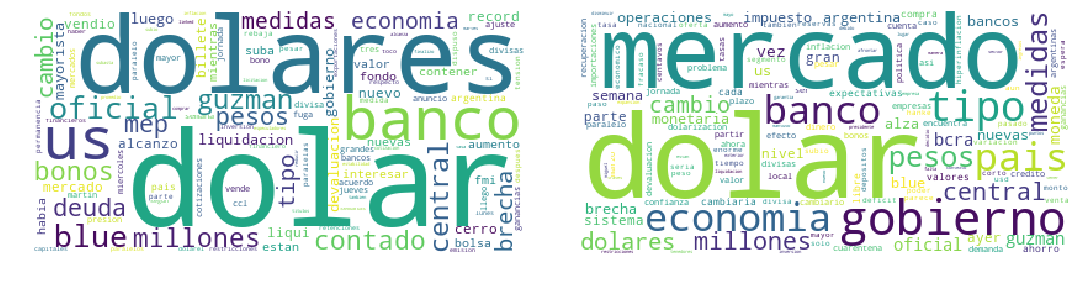

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,30))

cloud = WordCloud(background_color='white')

for words, ax in zip([words_izq, words_der], axes.flatten()):
    cloud.generate_from_frequencies(dict(Counter(words).most_common()))
    ax.imshow(cloud)
    ax.axis('off')
    
plt.show()

#### TfIDf
TfIDf score count per corpus

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

In [26]:
tfidf_izq = TfidfTransformer().fit_transform(tokens_izq_ex)
tfidf_der = TfidfTransformer().fit_transform(tokens_der_ex)

In [27]:
tfidf_izq_df = pd.DataFrame(tfidf_izq.todense(), columns = tokens_izq_ex.columns)
tfidf_der_df = pd.DataFrame(tfidf_der.todense(), columns = tokens_der_ex.columns)

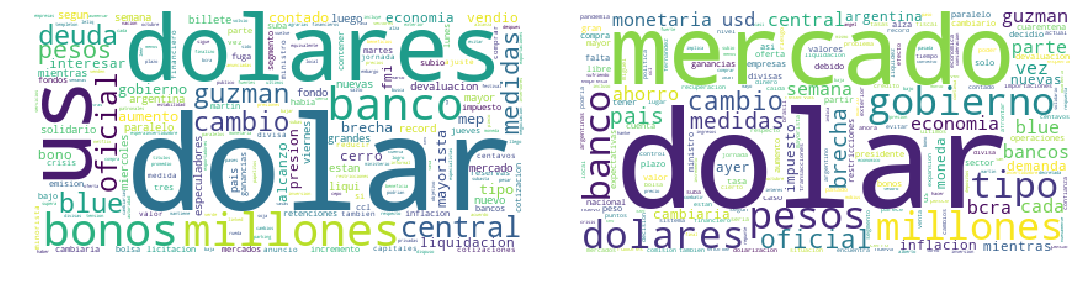

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,30))

cloud = WordCloud(background_color='white')

for df, ax in zip([tfidf_izq_df, tfidf_der_df], axes.flatten()):
    cloud.generate_from_frequencies(df.sum(axis=0).sort_values())
    ax.imshow(cloud)
    ax.axis('off')
    
plt.show()

Observation

In both cases, "dolar" is the most important term and it is in obvious relantionship with the central topic of these texts. The term "millones", the following more distintive term on either side, reinforces the idea about why the selected topic, the argentina currency rate of exchange, is something to be talking about. "medidas", "banco" and "cambio" are another important shared words also.

Nevertheless, there are again some terms that are mutually excluded between both clouds and appear to be saying something with semantic value. Meanwhile "bonos" and "deuda" seem to be significant to "izquierda diario"; "mercado" and "gobierno" are the same for "derecha diario".

Looking more closely, "us" and "fmi" are also two minor terms not mentioned by "derecha diario", where we found "ahorro" and "monetaria" are not present in "izquierda diario".